**AVIATION RISK INSIGHTS.**


**Introduction**

In the dynamic world of aviation, safety isn't just a regulatory checkbox—it's a business imperative. With thousands of flight incidents logged over the years, understanding the "why," "where," and "how" behind these events can empower decision-makers to anticipate risks and optimize operations.

This analysis leverages historical flight incident data to uncover patterns across flight purposes,Incident trends,, fatality trends and geospatial trends. From executive travel to aerial firefighting, we identify which flight categories carry higher risks—and where they’re most likely to occur.

By transforming raw aviation data into actionable insights, this project provides a data-driven foundation for smarter investments in flight safety, policy, and resource allocation.


**PROJECT OVERVIEW**
This project explores over 90,000 aviation incidents to uncover hidden trends and high-risk patterns across flight operations,

aiming to identify the safest aircraft makes for business investment.

Using Python for data wrangling and Tableau for visual storytelling, we analyze key variables such as event dates, locations, aircraft makes, engine types..


**DATA UNDERSTANDING**
The dataset, sourced from the U.S. National Transportation Safety Board (NTSB), contains 90,000+ aviation records spanning multiple decades. Each row represents an individual incident or accident, described with:

Event Details – Including date, location, country, and investigation type.

Aircraft Information – Manufacturer (e.g., CESSNA, BOEING), model, engine type, number of engines, and damage level.

Flight Context – Purpose of flight, weather conditions, airport details, and flight phase.

Casualties – Number of fatalities, serious injuries, minor injuries, and uninjured persons.

Geographic Coordinates – Latitude and longitude for spatial analysis.

We are going to uncover missing values, mixed data types, and inconsistent labels, which we will address during preprocessing to ensure clean, analysis-ready data.

This rich and diverse dataset provided the foundation for identifying trends, quantifying risk, and visualizing aviation safety insights that matter to both operations and business strategy.




**DATA ANALYSIS**
We are going to load our data that is *Aviation_Data.csv*, deal with missing values, adress data inconsistencies, aggregating and visualizaing data is to help the organization in  making data driven decisions. We will relate our findings to business intelligence by making recommendations for how the business should move forward with the new aviation opportunity.

Import necessary tools for the excercise
For Data Handling

In [2]:
import pandas as pd
import numpy as np

For Visualization

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

#set
sns.set(style ='whitegrid')
plt.style.use('ggplot')

For date handling

In [3]:
from datetime import datetime

In [28]:
#loading data to our jupyter notebook for analysis using pandas

df = pd.read_csv('Aviation_Data.csv', low_memory = False)

In [17]:
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [32]:
#lets replace replace'.', with'_' to make our data look beautiful

df.columns = [col.replace('.', '_') for col in df.columns]
df.columns


Index(['Event_Id', 'Investigation_Type', 'Accident_Number', 'Event_Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport_Code',
       'Airport_Name', 'Injury_Severity', 'Aircraft_damage',
       'Aircraft_Category', 'Registration_Number', 'Make', 'Model',
       'Amateur_Built', 'Number_of_Engines', 'Engine_Type', 'FAR_Description',
       'Schedule', 'Purpose_of_flight', 'Air_carrier', 'Total_Fatal_Injuries',
       'Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured',
       'Weather_Condition', 'Broad_phase_of_flight', 'Report_Status',
       'Publication_Date'],
      dtype='object')

In [33]:
#Lets Check for dublicates
df.duplicated().sum()

1390

In [ ]:
We have 1390 duplicates (These dublicate may indicate 0 due to restarting the Kernel)

In [39]:
#lets check where are these dublicates
duplicates = df[df.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [Event_Id, Investigation_Type, Accident_Number, Event_Date, Location, Country, Latitude, Longitude, Airport_Code, Airport_Name, Injury_Severity, Aircraft_damage, Aircraft_Category, Registration_Number, Make, Model, Amateur_Built, Number_of_Engines, Engine_Type, FAR_Description, Schedule, Purpose_of_flight, Air_carrier, Total_Fatal_Injuries, Total_Serious_Injuries, Total_Minor_Injuries, Total_Uninjured, Weather_Condition, Broad_phase_of_flight, Report_Status, Publication_Date]
Index: []

[0 rows x 31 columns]


These 1390 rows are not true duplicates.

They are empty shells:

Event_Id, Accident_Number, Location, Latitude, Longitude, Purpose_of_flight, etc. are all NaN.

The only column with any values is Investigation_Type (date), but everything else is missing This means that these are Bad imports or parsing leftovers.Rows that were meant to be dropped during preprocessing but remained. Not analytically useful — they don't contribute to any insight or analysis. We will therefor drop them safely.

In [36]:
#Lets investigate what is in Investigation_Type
df['Investigation_Type' ].value_counts()

Investigation_Type
Accident      85015
Incident       3874
25-09-2020      702
26-09-2020       60
02-02-2021       39
              ...  
13-09-2021        1
04-08-2021        1
05-08-2022        1
03-11-2020        1
06-01-2021        1
Name: count, Length: 71, dtype: int64

Here we have 85015 Accidents, 3874 Incidents.
We expect the column to be either Accident or incident but it's infested with date-like strings like "25-09-2020"
We have to start our cleaning by filtering this.

In [37]:
#lets filter Investigation_Type
df = df[df['Investigation_Type'].isin(['Accident', 'Incident'])]

In [38]:
#Investigate again
df['Investigation_Type' ].value_counts()

Investigation_Type
Accident    85015
Incident     3874
Name: count, dtype: int64

our column **Investigation_Type** looks good now
Lets now drop the duplicates

In [44]:
#Dropping Dublicates
df = df.drop_duplicates()
print(df.duplicated().sum())

0


We now have zero duplicate

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88889 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event_Id                88889 non-null  object 
 1   Investigation_Type      88889 non-null  object 
 2   Accident_Number         88889 non-null  object 
 3   Event_Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport_Code            50132 non-null  object 
 9   Airport_Name            52704 non-null  object 
 10  Injury_Severity         87889 non-null  object 
 11  Aircraft_damage         85695 non-null  object 
 12  Aircraft_Category       32287 non-null  object 
 13  Registration_Number     87507 non-null  object 
 14  Make                    88826 non-null  obj

After cleaning Investigation_Type and dropping duplicates we now have 88889 rows from 90348 and 31 columns.
Aircraft Make and Model are mostly present  88826 entries – this is great since we need them for risk analysis.
Latitudes and longitudes have missing data with scheduel havin the most missing data

In [47]:
# Replace NaNs in injury columns with 0, without dropping rows
df['Total_Injuries'] = (
    df['Total_Fatal_Injuries'].fillna(0) +
    df['Total_Serious_Injuries'].fillna(0) +
    df['Total_Minor_Injuries'].fillna(0)
)


In [48]:
# Drop rows where ALL columns are NaN
core_cols = ['Event_Id', 'Accident_Number', 'Event_Date', 'Location', 'Latitude', 'Longitude']


In [49]:
df = df.dropna(subset=core_cols, how='all')

Our data looks clean but lets standadize text for grouping

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88889 entries, 0 to 90347
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event_Id                88889 non-null  object 
 1   Investigation_Type      88889 non-null  object 
 2   Accident_Number         88889 non-null  object 
 3   Event_Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport_Code            50132 non-null  object 
 9   Airport_Name            52704 non-null  object 
 10  Injury_Severity         87889 non-null  object 
 11  Aircraft_damage         85695 non-null  object 
 12  Aircraft_Category       32287 non-null  object 
 13  Registration_Number     87507 non-null  object 
 14  Make                    88826 non-null  obj

In [51]:
#Convert Event.Date to datetime
df['Event.Date'] = pd.to_datetime(df['Event_Date'], errors='coerce')

In [52]:
df['Make'] = df['Make'].str.upper().str.strip()
df['Model'] = df['Model'].str.upper().str.strip()

Finaly lets clean the weather condition values

In [53]:
df['Weather_Condition'] = df['Weather_Condition'].str.upper().str.strip()


In [54]:
#  we drop event_date which seems to appear twice
df = df.loc[:, ~df.columns.duplicated()]


We will need Total injuries in our analysis therefore lets create a new column called Total_injuries

In [55]:
df['Total_Injuries'] = df['Total_Fatal_Injuries'] + df['Total_Serious_Injuries'] + df['Total_Minor_Injuries']

**Lets Begin Our Analysis and visualization**

We are supposed to first determine which aircraft are the lowest risk for the company to start this new business endeavor.
below is step by step analysis.(We may do some additional cleaning along the way)

**AIRCRAFT SUMMARY**


**AIRCRAFT WITH HIGHEST INCIDENTS**

In [58]:
#we combine make and model
df['Aircraft'] = df['Make'] + ' ' + df['Model']

In [61]:
make_summary = df.groupby('Make').agg({
    'Event_Id': 'count',
    'Total_Fatal_Injuries': 'sum',
    'Total_Injuries': 'sum'
}).rename(columns={
    'Event_Id': 'Total_Incidents',
    'Total_Fatal_Injuries': 'Total_Fatalities',
    'Total_Injuries': 'Total_Injuries'
})

# Sort by highest number of fatalities
make_summary = make_summary.sort_values(by='Total_Fatalities', ascending=False)
make_summary.head(10)

,Total_Incidents,Total_Fatalities,Total_Injuries
Make,,,
CESSNA,27149,9641.0,17786.0
BOEING,2745,8748.0,8994.0
PIPER,14870,6689.0,11564.0
BEECH,5372,3784.0,5153.0
BELL,2722,1332.0,2739.0
AIRBUS,291,1325.0,1483.0
MCDONNELL DOUGLAS,608,1286.0,2732.0
AIRBUS INDUSTRIE,164,1174.0,785.0
DOUGLAS,281,984.0,1225.0


In this case **CESSNA** Leads, followed by **Boeng** and **Piper**

**AIRCRAFT WITH HIGHEST FATALITIES**

In [59]:
aircraft_summary = (
    df.groupby('Aircraft')
    .agg({
        'Event_Id': 'count',
        'Total_Fatal_Injuries': 'sum',
        'Total_Injuries': 'sum'
    })
    .rename(columns={
        'Event_Id': 'Total_Incidents',
        'Total_Fatal_Injuries': 'Total_Fatalities',
        'Total_Injuries': 'Total_Injuries'
    })
)
#lets Filter for aircraft with at least a reasonable number of incidents
filtered = aircraft_summary[aircraft_summary['Total_Incidents'] >= 5]

aircraft_summary = aircraft_summary.sort_values(by='Total_Fatalities', ascending=False)
aircraft_summary.head(20)

,Total_Incidents,Total_Fatalities,Total_Injuries
Aircraft,,,
BOEING 737,489,1348.0,1826.0
BOEING 737-200,53,906.0,376.0
BOEING 777 - 206,3,534.0,534.0
CESSNA 172N,1163,428.0,824.0
BOEING MD-82,8,403.0,172.0
CESSNA 172,1753,398.0,992.0
CESSNA 152,2366,390.0,899.0
AIRBUS A321,20,381.0,383.0
PIPER PA-28-181,529,380.0,580.0


In this case **BOENG 732** Leads, followed by **Boeng 737-200** and **Boeng 777-200** few incidents but high rate of fatalities

Then we will sort by injury to find the **SAFEST AIRCRAFT**


In [62]:
lowest_risk_aircraft = (
    filtered.sort_values(by=['Total_Fatalities', 'Total_Injuries', 'Total_Incidents'])
    .head(20)
)
lowest_risk_aircraft


,Total_Incidents,Total_Fatalities,Total_Injuries
Aircraft,,,
AGUSTAWESTLAND AW139,5,0.0,0.0
AIRBUS A220,5,0.0,0.0
AIRBUS INDUSTRIE A319-111,5,0.0,0.0
BEECH 99A,5,0.0,0.0
BOEING 727-233,5,0.0,0.0
BOEING B737,5,0.0,0.0
BOEING B75-N1,5,0.0,0.0
BOMBARDIER CL-600,5,0.0,0.0
BOMBARDIER CL600 2D24,5,0.0,0.0


Based on Aircraft Summary
Aircraft models such as the **Airbus A220**, **Boeing 727-233**, **Piper PA 28R**, and **Maule M-7-260C** have shown excellent safety records, with zero fatalities and injuries across five incidents each. This suggests these are suitable low-risk options for launching a new aviation business.

Conversley
Aircraft makes such as **Cessna**, **Piper**, and **Boeing** in general, have significantly higher incident counts, with thousands of fatalities and injuries, and should be approached with caution — especially when the specific model is not proven to be safe.

**Visualisation of Top 10 Aircrafts wit highest incidents and injuries**

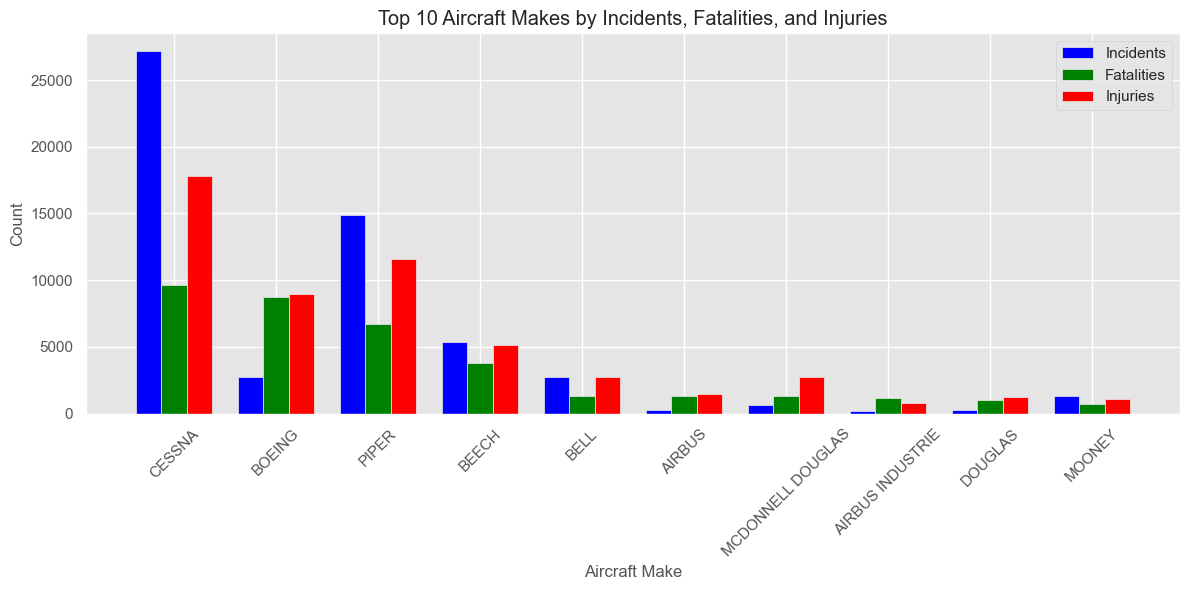

In [63]:
# Reset index to make 'Make' a column
make_summary_top10 = make_summary.head(10).reset_index()

plt.figure(figsize=(12, 6))

bar_width = 0.25
x = range(len(make_summary_top10))

plt.bar(x, make_summary_top10['Total_Incidents'], width=bar_width, label='Incidents', color='blue')
plt.bar([i + bar_width for i in x], make_summary_top10['Total_Fatalities'], width=bar_width, label='Fatalities', color='green')
plt.bar([i + 2 * bar_width for i in x], make_summary_top10['Total_Injuries'], width=bar_width, label='Injuries', color='red')

# Add labels and title
plt.xlabel('Aircraft Make')
plt.ylabel('Count')
plt.title('Top 10 Aircraft Makes by Incidents, Fatalities, and Injuries')
plt.xticks([i + bar_width for i in x], make_summary_top10['Make'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

**From the above grouped chat we draw the following.**

Cessna stands out with the highest number of incidents i.e 27 149, followed by Piper and Beech. This likely reflects high fleet volume and usage in general aviation.

Cessna also leads in total fatalities and injuries, suggesting a higher exposure to risk, potentially due to aircraft type e.g., small, non-commercial or flight purposes.

Boeing has a relatively low number of incidents, but a very high fatality count. This is characteristic of fewer but more catastrophic events, consistent with its role in commercial aviation.

Airbus shows even fewer incidents and fatalities, aligning with strong safety records or smaller dataset representation compared to U.S.-centric records.

Manufacturers like Bell and McDonnell Douglas also reflect moderate fatalities with lower overall incidents, which may point to niche aircraft uses or older fleet involvement.
 
**Business Implication:**
Aircraft make is a crucial risk dimension. Safety programs, insurance models, and procurement strategies must factor in both the frequency and severity of past incidents.

**Accident Trends Over Time**

This will help us in decision making

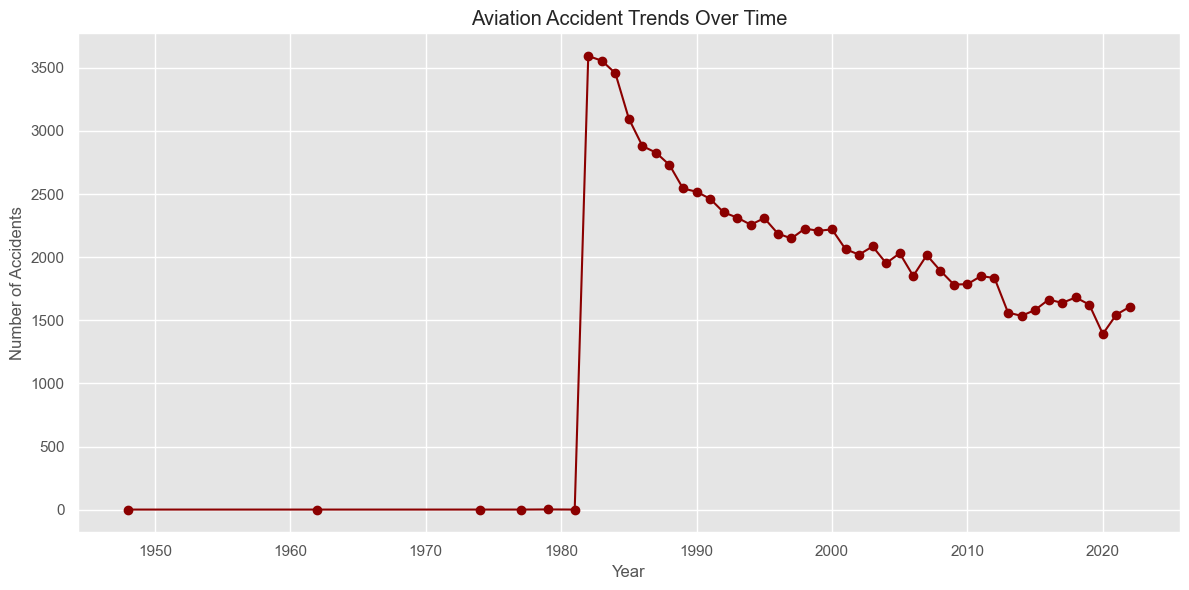

In [31]:

df['Event_Date'] = pd.to_datetime(df['Event.Date'], errors='coerce')

df = df.dropna(subset=['Event_Date'])

df['Event_Year'] = df['Event_Date'].dt.year

accident_trends = df['Event_Year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
accident_trends.plot(kind='line', marker='o', color='darkred')
plt.title('Aviation Accident Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.tight_layout()
plt.show()

**Observation**
There is a sudden spike in accident count around 1982.
From 1983 onward there is a steady and significant decline in the number of aviation accidents.
By 2020 the number of annual accidents is less than half of what was in the early 1980s
**Explanation**
Possible data reporting improvement in 1982 the sharp spike indicate a big change in data collection.
Safety Regulation enhancement - the decline starting in the 1080s reflect a stringent aviation regulations, better complience, and industry oversight.
Technological Advancement
Improved aircraft design, more reliable engines, redundant systems, better materials greatly enhanced safety.
Digitl automation reduced pilot errors - historically a major cause of the accidents.

**What this means**
Modern aviation is significantly safer than was a decade ago
Investing in modern equipment, pilot traing and regulatory compliance is key to mantaining safety.
Despite the drop in accidents, risk still exist and entry into aviation sector demands high safety culture and quality controls.


**Total Fatal Injuries by Purpose of Flight**

In [66]:

# Group by Purpose of Flight and sum fatalities
fatalities_by_purpose = df.groupby('Purpose_of_flight')['Total_Fatal_Injuries'].sum().sort_values(ascending=False)

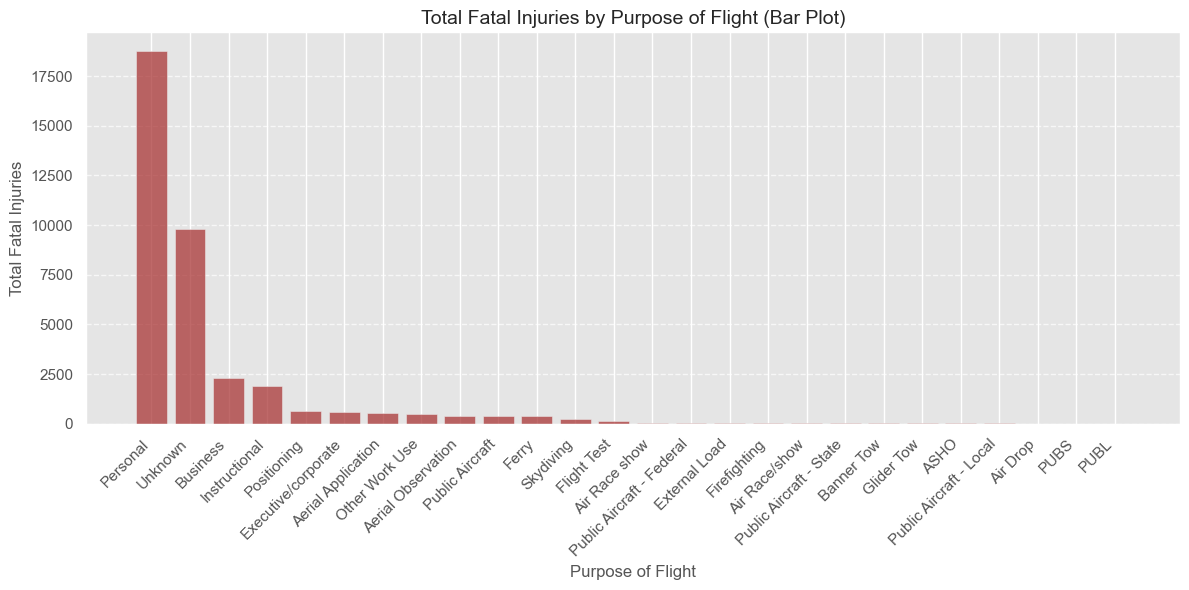

In [68]:
# x = Purpose of Flight, y = Total Fatal Injuries
x = fatalities_by_purpose.index
y = fatalities_by_purpose.values

# Plot
plt.figure(figsize=(12, 6))
plt.bar(x, y, color='brown', alpha=0.7)
plt.title('Total Fatal Injuries by Purpose of Flight (Bar Plot)', fontsize=14)
plt.xlabel('Purpose of Flight')
plt.ylabel('Total Fatal Injuries')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Observation**
**Top 3 Fatal Flight Purposes**
Personal Flights, Unkown Purpose and Business Flights.
**Moderate Risk Categories**
Instructional, Positioning, Corporate/Executive.
**Low Fatality categories**
Aerial application, Ferru, Skydiving, Firefighting.
**Very Low Fatalities**
Public Aircraft-State, Glider Tow, Air Drop and PUBL.
**Recommendation**
Avoid Personal Aviation as a primary purpose
Leverage low risk niches for entry

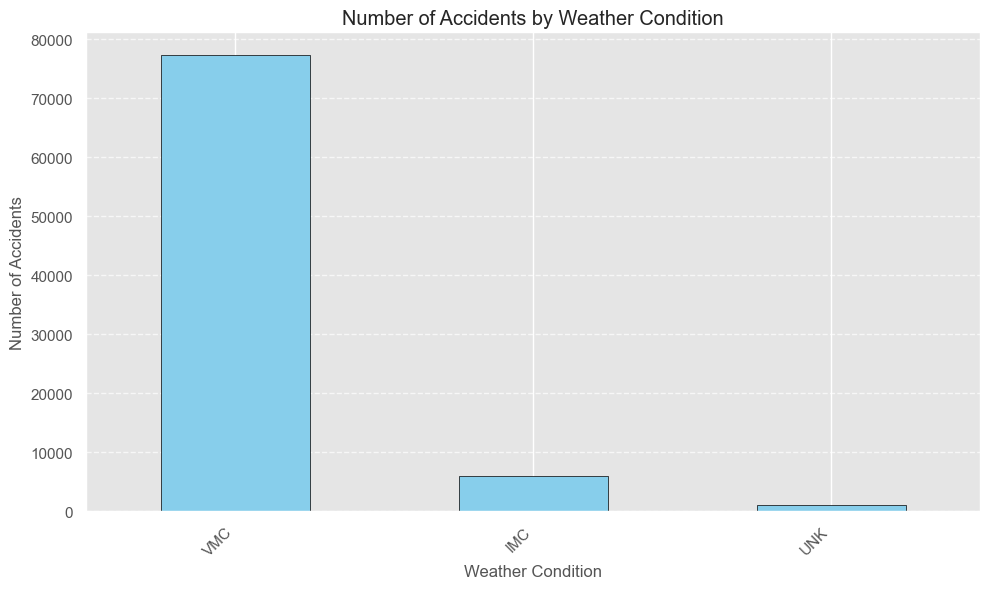

In [69]:

# Count number of accidents per weather condition
weather_counts = df['Weather_Condition'].value_counts().dropna()

# Plot
plt.figure(figsize=(10, 6))
weather_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Number of Accidents by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


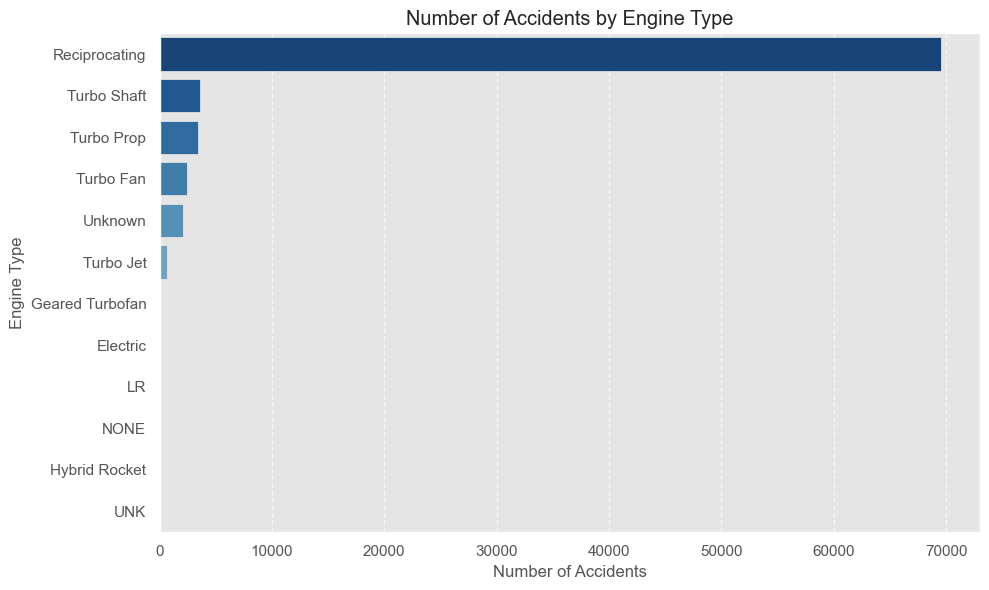

In [70]:
engine_counts = df['Engine_Type'].value_counts().dropna()

plt.figure(figsize=(10, 6))
sns.barplot(x=engine_counts.values, y=engine_counts.index, palette='Blues_r')

plt.title('Number of Accidents by Engine Type')
plt.xlabel('Number of Accidents')
plt.ylabel('Engine Type')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Observation**

Reciprocating Engines Dominate Accidents. These engines are by far the most common in the dataset, with accident numbers far exceeding all other types.
Other Engine Types (in descending accident count); Turbo Shaft: Often found in helicopters, Turbo Prop: Common in regional and smaller commercial aircraft, Turbo Fan: Common in modern commercial jets (e.g., Boeing 737, Airbus A320), Turbo Jet: Older commercial and military jets, Electric, Hybrid Rocket, LR.
For the private aviation sector e.g. flight training, private charter, using aircraft with reciprocating engines, which statistically have higher accident counts—but this might be due more to their prevalence than inherent danger. NOTE; Personal Flight purpose had so many incidences and fatalities, we will therefore not consider the reciprocating engines.
For commercial aviation, turbofan engines have fewer accidents in this dataset, possibly indicating lower risk per aircraft due to rigorous safety protocols and maintenance.



**Visualize Number of Accidents by Engine Count**

In [71]:
#Filter Aircrafts with zero engines
df_engines = df[df['Number_of_Engines'] > 0]

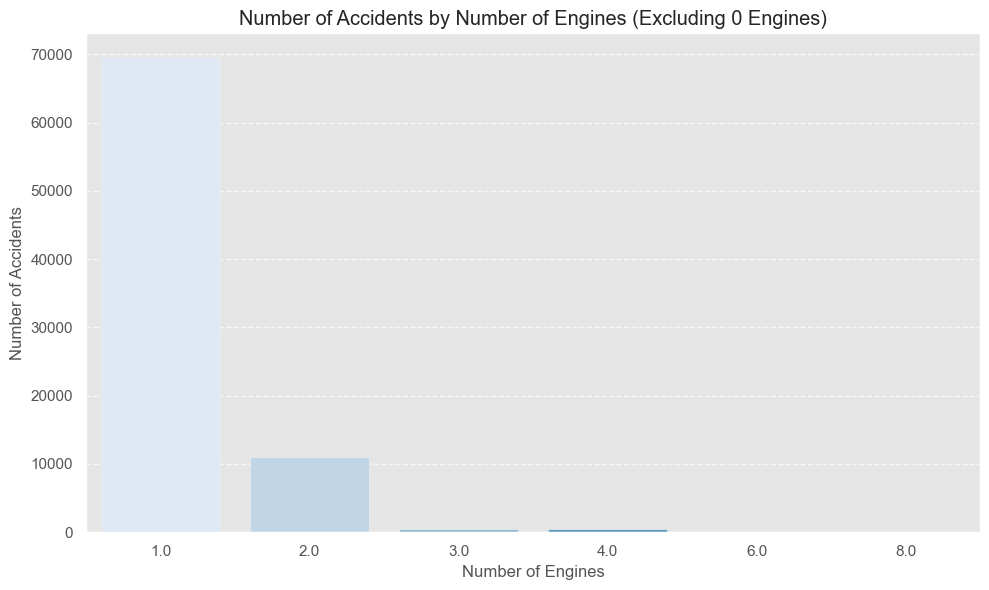

In [72]:
# Count incidents by number of engines
engine_counts = df_engines['Number_of_Engines'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=engine_counts.index.astype(str), y=engine_counts.values, palette='Blues')

plt.title('Number of Accidents by Number of Engines (Excluding 0 Engines)')
plt.xlabel('Number of Engines')
plt.ylabel('Number of Accidents')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Observation**
1-engine aircraft had the most accidents 70,000+, 2-engine aircraft follow by 11,000+ accidents, 3-engine and 4-engine aircraft had very few accidents in comparison. Theerefore, accidents are overwhelmingly linked to single-engine aircraft, which are widely used in private/general aviation. For lower-risk operations, especially for commercial we will use, 2 or more engines which offer greater reliability and safety. (3-4 Engines might be expensive for a start)

[nan 'SCHD' 'NSCH' 'UNK']


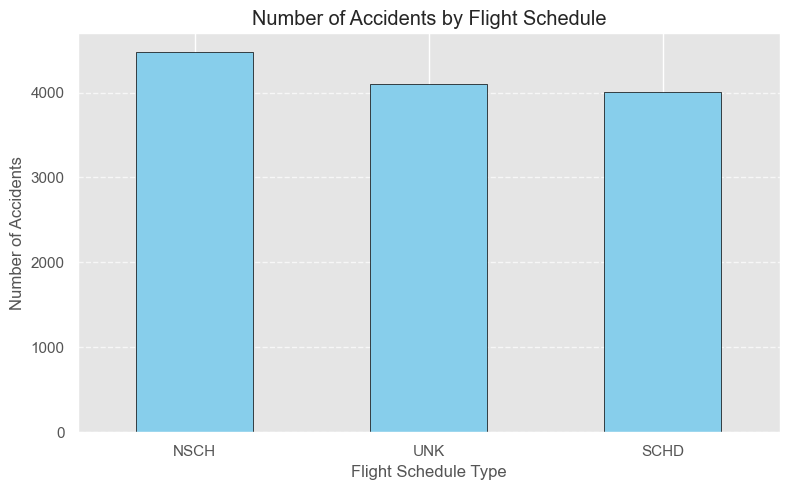

In [73]:
# Check for unique values first
print(df['Schedule'].unique())

# we drop NaNs for clarity
schedule_counts = df['Schedule'].dropna().value_counts()

plt.figure(figsize=(8, 5))
schedule_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Number of Accidents by Flight Schedule')
plt.xlabel('Flight Schedule Type')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**Lets now shift to Tableu Visualization**

In [76]:
df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')
df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')

#Drop rows with missing coordinates
df_tableu = df.dropna(subset=['Latitude', 'Longitude']).copy()

 #Preview the cleaned data
print(df_tableu[['Latitude', 'Longitude']].head())


print(f"Original shape: {df.shape}")
print(f"Cleaned shape: {df_tableu.shape}")
print(df_tableu[['Latitude', 'Longitude']].head())

       Latitude   Longitude
2     36.922223  -81.878056
5     42.445277  -70.758333
593   30.757778  -88.355555
3654  46.041111 -120.849722
6202  48.120000 -113.887500
Original shape: (88889, 34)
Cleaned shape: (11968, 34)
       Latitude   Longitude
2     36.922223  -81.878056
5     42.445277  -70.758333
593   30.757778  -88.355555
3654  46.041111 -120.849722
6202  48.120000 -113.887500


In [77]:
# Save to CSV
df_tableu.to_csv('df_tableu.csv', index=False)


In [ ]:
#df_tableu.info()

In [43]:
df.columns

Index(['Event_Id', 'Investigation_Type', 'Accident_Number', 'Event_Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport_Code',
       'Airport_Name', 'Injury_Severity', 'Aircraft_damage',
       'Aircraft_Category', 'Registration_Number', 'Make', 'Model',
       'Amateur_Built', 'Number_of_Engines', 'Engine_Type', 'FAR_Description',
       'Schedule', 'Purpose_of_flight', 'Air_carrier', 'Total_Fatal_Injuries',
       'Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured',
       'Weather_Condition', 'Broad_phase_of_flight', 'Report_Status',
       'Publication_Date', 'Total_Injuries', 'Event.Date', 'Aircraft',
       'Event_Year'],
      dtype='object')